# K-最近傍法モデルでの多クラス分類

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('sklearn version : ' + sklearn.__version__)

sklearn version : 0.24.0


# データセットの読み込み

In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print("cancer.keys : \n", cancer.keys())
print("\nfeature_names : \n", cancer.feature_names)
print("\ndata.shape : \n", cancer.data.shape)
print("\ndata : ", cancer.data[:3])
print("\ntarget_names : \n", cancer.target_names)
print("\ntarget.shape : \n", cancer.target.shape)
print("\nSample counts per class : \n",{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

cancer.keys : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

feature_names : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

data.shape : 
 (569, 30)

data :  [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.65

# 訓練データとテストデータの分類

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
print("X_train.shape : ", X_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (426, 30)
X_test.shape :  (143, 30)
y_train.shape :  (426,)
y_test.shape :  (143,)


# K-最近傍法(KNeighborsClassifier)モデル学習

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [10]:
knn.score(X_test, y_test)

0.916083916083916

# モデル分析

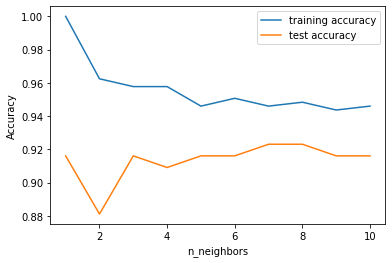

In [11]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

for n in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()